In [1]:
import numpy as np
import scipy.spatial.transform.rotation
import matplotlib.pyplot as plt

In [2]:
import geometry

In [37]:
cube_vertices = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1],
                          [-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])

gr = (1 + np.sqrt(5))/2
icosahedron_vertices = np.array([[0,1,gr],[0,1,-gr],[0,-1,gr],[0,-1,-gr],[1,gr,0],[1,-gr,0],
                     [-1,gr,0],[-1,-gr,0],[gr,0,1],[-gr,0,1],[gr,0,-1],[-gr,0,-1]])

dodecahedron_vertices = np.array([
    [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],[-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1],
    [0, gr, 1 / gr], [0, -gr, 1 / gr], [0, gr, -1 / gr], [0, -gr, -1 / gr],
    [gr, 1 / gr, 0], [-gr, 1 / gr, 0], [gr, -1 / gr, 0], [-gr, -1 / gr, 0],
    [1 / gr, 0, gr], [1 / gr, 0, -gr], [-1 / gr, 0, gr], [-1 / gr, 0, -gr]
])

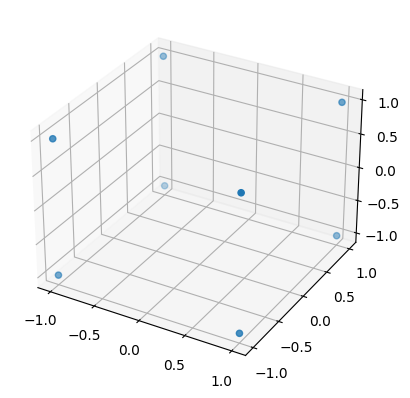

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2])
ax.set_aspect('equal')
plt.show()

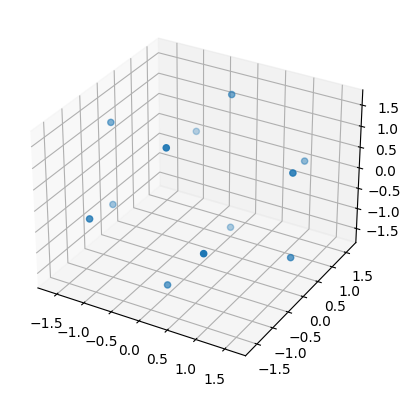

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(icosahedron_vertices[:, 0], icosahedron_vertices[:, 1], icosahedron_vertices[:, 2])
ax.set_aspect('equal')
plt.show()

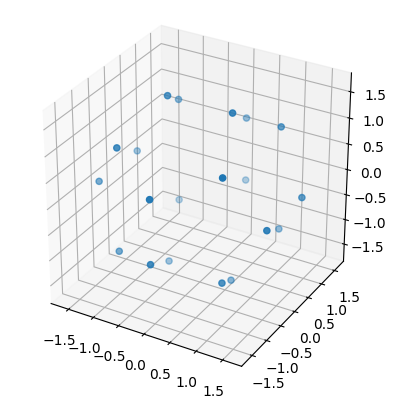

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dodecahedron_vertices[:, 0], dodecahedron_vertices[:, 1], dodecahedron_vertices[:, 2])
ax.set_aspect('equal')
plt.show()

In [61]:
def rot_from_vecs(vec1, vec2=[1,0,0]):
    matrix = rotation_matrix_from_vectors(vec1, vec2)
    transform = geometry.Transform(translation=[0,0,0], rotation=scipy.spatial.transform.Rotation.from_matrix(matrix).as_euler('zyx', degrees=False))
    return transform
    
    
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

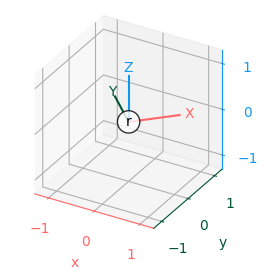

In [62]:
rot_from_vecs([1,0,0], [1,1,0]).plot_self()

In [66]:
transforms = []
for vec in cube_vertices:
    transforms.append(rot_from_vecs(vec))

In [68]:
transforms = []
for vec in icosahedron_vertices:
    transforms.append(rot_from_vecs(vec))

In [73]:
transforms = []
for vec in dodecahedron_vertices:
    transforms.append(rot_from_vecs(vec))

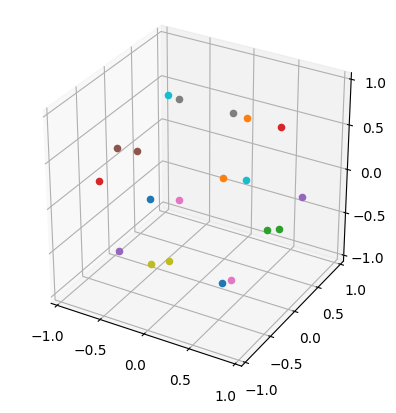

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in transforms:
    point = t.apply_to_point([1,0,0],)
    ax.scatter(point[0], point[1], point[2])
ax.set_aspect('equal')
plt.show()

In [76]:
transforms

20

In [ ]:
import numpy as np
import scipy.spatial.transform.Rotation
import geometry

def rot_from_vecs(vec1, vec2=[1,0,0]):
    matrix = rotation_matrix_from_vectors(vec1, vec2)
    transform = geometry.Transform(translation=[0,0,0], rotation=scipy.spatial.transform.Rotation.from_matrix(matrix).as_euler('zyx', degrees=False))
    return transform
    
    
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

def get_dodecahedron_transforms():
    gr = (1 + np.sqrt(5))/2
    dodecahedron_vertices = np.array([
    [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],[-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1],
    [0, gr, 1 / gr], [0, -gr, 1 / gr], [0, gr, -1 / gr], [0, -gr, -1 / gr],
    [gr, 1 / gr, 0], [-gr, 1 / gr, 0], [gr, -1 / gr, 0], [-gr, -1 / gr, 0],
    [1 / gr, 0, gr], [1 / gr, 0, -gr], [-1 / gr, 0, gr], [-1 / gr, 0, -gr]])
    transforms = []
    for vec in dodecahedron_vertices:
        transforms.append(rot_from_vecs(vec))
    return transforms

def get_icosahedron_transforms():
    gr = (1 + np.sqrt(5))/2
    icosahedron_vertices = np.array([[0,1,gr],[0,1,-gr],[0,-1,gr],[0,-1,-gr],[1,gr,0],[1,-gr,0],
                     [-1,gr,0],[-1,-gr,0],[gr,0,1],[-gr,0,1],[gr,0,-1],[-gr,0,-1]])
    transforms = []
    for vec in icosahedron_vertices:
        transforms.append(rot_from_vecs(vec))
    return transforms

def get_cube_transforms():
    cube_vertices = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1],
                          [-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
    transforms = []
    for vec in cube_vertices:
        transforms.append(rot_from_vecs(vec))
    return transforms